In [1]:
import neptune as neptune
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as mticker

from misc import get_neptune_table, get_activations, plot_module, get_steps_from_first_run, pivot_dict, plot_loss_vs_lr

In [2]:
tags = ['muP_MoE', 'test_grid']

df = get_neptune_table(tags)
print(df.shape)

https://app.neptune.ai/pmtest/llm-random/
Table downloaded
Shape: (45, 608)
(45, 608)


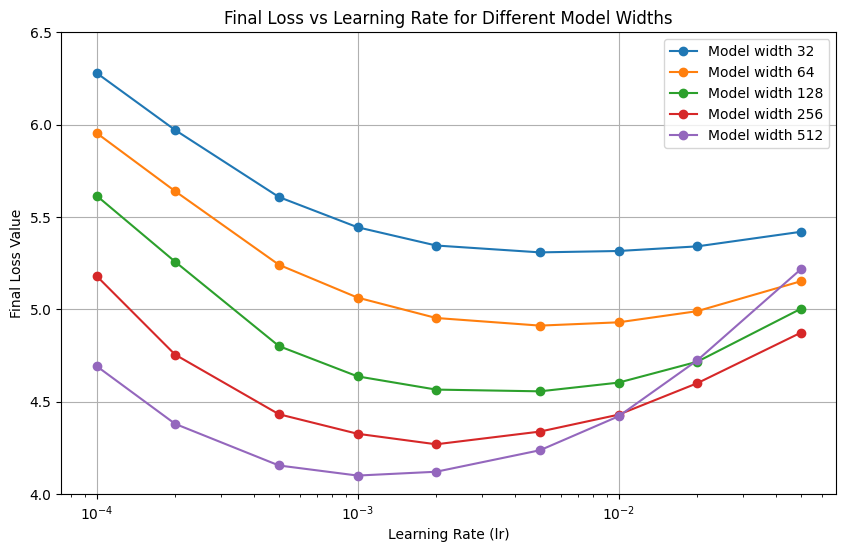

In [3]:
plot_loss_vs_lr(df, (4, 6.5))

In [8]:
tags = ['muP_MoE', 'norm_plot_test']

df = get_neptune_table(tags)
print(df.shape)

https://app.neptune.ai/pmtest/llm-random/
Table downloaded
Shape: (2, 229)
(2, 229)


In [9]:
act_dict = get_activations(df, 'mean')
print(act_dict)


run ID: LLMRANDOM-23461
https://app.neptune.ai/pmtest/llm-random/e/LLMRANDOM-23461
run keys
<Namespace field at "block_0/residual_attention">
n_blocks: 4
run ID: LLMRANDOM-23256
https://app.neptune.ai/pmtest/llm-random/e/LLMRANDOM-23256
run keys
<Namespace field at "block_0/residual_attention">
n_blocks: 4
{'LLMRANDOM-23461': {'dmodel': 512, 0: {'attn':         step      value               timestamp
0        0.0   0.425781 2024-11-28 11:49:28.843
1      100.0  23.625000 2024-11-28 11:49:37.254
2      200.0   3.531250 2024-11-28 11:49:45.627
3      300.0   3.703125 2024-11-28 11:49:54.045
4      400.0   4.593750 2024-11-28 11:50:02.490
..       ...        ...                     ...
158  15800.0  14.250000 2024-11-28 12:13:50.028
159  15900.0  14.250000 2024-11-28 12:13:59.319
160  16000.0  14.250000 2024-11-28 12:14:08.585
161  16100.0  14.187500 2024-11-28 12:14:18.146
162  16200.0  14.125000 2024-11-28 12:14:27.424

[163 rows x 3 columns], 'FF':         step       value             

In [10]:
steps = get_steps_from_first_run(act_dict)
layer_num = 2
module='FF'
pivoted_dict = pivot_dict(
    activations_dict=act_dict,
    steps=steps,
    dmodels=[32, 64, 128, 256, 512],
    layer_num=layer_num,
    module=module,
)

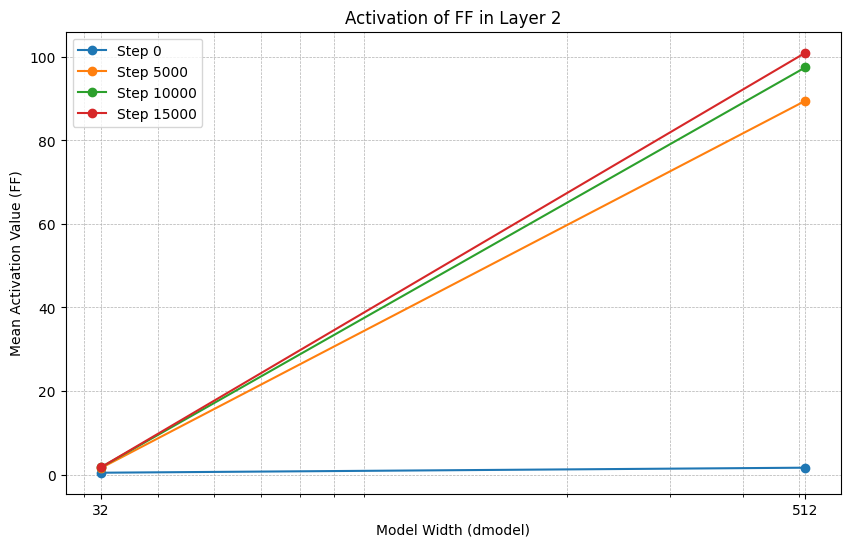

In [11]:
plot_module(
    pivoted_dict=pivoted_dict,
    module_keyword=module,
    layer_num=layer_num,
    step_interval=5000,
)